In [1]:
'''Titanic Survival prediction'''

'''Supervised Machine Learning Techniques to be used:

1. Logistic Regression
2. Decision Tree
3. K Nearest-Neighbour (KNN)
4. Random Forest
5. SVM
6. Gaussian NB 
7. XGBoost
'''

'Supervised Machine Learning Techniques to be used:\n\n1. Decision Tree\n2. Random Forrest\n3. Support Vector Machine (SVM)\n4. KNN - K-Nearest Neighbour Method\n5. Naive Bayes\n6. Neural Network\n7. Gradient Boosting Classification\n8. Logistinc Regression'

In [2]:
'''Model Performance:
Accurcay'''

'Model Performance:\n1. ROC Curve'

In [3]:
'''Importing Packages'''
import numpy as nm
import pandas as pd
import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
'''Importing Dataset'''
X_train = pd.read_csv('./titanic/train.csv')
X_test = pd.read_csv('./titanic/test.csv')
# titanic=pd.concat([X_train, X_test], sort=False)

In [6]:
'''Creating New Features out of Titles of Each Individuals'''

X_train['Title'] = X_train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
X_test['Title'] = X_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [7]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [8]:
X_train.Title = X_train.Title.map(normalized_titles)
X_test.Title = X_test.Title.map(normalized_titles)

In [9]:
train_grouped = X_train.groupby(['Pclass', 'Sex', 'Title'])
test_grouped = X_test.groupby(['Pclass', 'Sex', 'Title'])

In [10]:
'''Missing Data Augmentation'''
# apply the grouped median value on the Age NaN
X_train.Age = train_grouped.Age.apply(lambda x: x.fillna(x.median()))
X_test.Age = test_grouped.Age.apply(lambda x: x.fillna(x.median()))

In [11]:
most_embarked = X_train.Embarked.value_counts().index[0]
X_train.Embarked = X_train.Embarked.fillna(most_embarked)

In [12]:
X_test.Fare = X_test.Fare.fillna(X_test.Fare.median())

In [13]:
X_train.Cabin = X_train.Cabin.fillna('U')
X_test.Cabin = X_test.Cabin.fillna('U')

In [14]:
'''Adding one more feature of Family Size of a Person'''
X_train['FamilySize'] = X_train.SibSp + X_train.Parch + 1
X_test['FamilySize'] = X_test.SibSp + X_test.Parch + 1

In [15]:
X_train.Cabin = X_train.Cabin.map(lambda x: x[0])
X_test.Cabin = X_test.Cabin.map(lambda x: x[0])

In [16]:
X_train.shape, X_test.shape

((891, 14), (418, 13))

In [17]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1


In [18]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Mrs,3


In [19]:
'''Creating Dummies of Features'''
def get_features(table):
    
#     sex_dummies = pd.get_dummies(table.Sex, prefix="Sex")
    table['Sex'] = table['Sex'].map({"male": 0, "female": 1})
    table['Sex'] = table['Sex'].astype('uint8')
    # create dummy variables for categorical features
    pclass_dummies = pd.get_dummies(table.Pclass, prefix="Pclass")
    title_dummies = pd.get_dummies(table.Title, prefix="Title")
    cabin_dummies = pd.get_dummies(table.Cabin, prefix="Cabin")
    embarked_dummies = pd.get_dummies(table.Embarked, prefix="Embarked")
    # concatenate dummy columns with main dataset
    table_dummies = pd.concat([table, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

    # drop categorical fields
    table_dummies.drop(['PassengerId','Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
    return table_dummies

In [20]:
train = get_features(X_train)
test = get_features(X_test)
test['Cabin_T'] = 0
test['Cabin_T'] = test['Cabin_T'].astype('uint8')

In [27]:
x_train = train.drop('Survived', axis=1) 
y_train = train['Survived']
# create array for test set
x_test = test

In [61]:
'''Importing Machine Learning Packages'''
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from skopt import gp_minimize
from skopt.space import Real, Integer
from functools import partial

In [29]:
'''Creating Train and Validation Dataset'''
train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [37]:


def model(X,Y,x,y):

#     Logistinc Regression
    log = LogisticRegression(random_state=0)
    log.fit(X,Y)
    log.predict(x)
    
#     Decision Tree
    des_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    des_tree.fit(X,Y)
    des_tree.predict(x)
    
#     Knearestneighbour
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p =2)
    knn.fit(X,Y)
    knn.predict(x)
    
#     Random Forrest Model
    forrest = RandomForestClassifier(random_state=0)
    forrest.fit(X,Y)
    forrest.predict(x)
    
# Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X, Y)
    svc_lin.predict(x)

#Using SVC method of svm class to use Kernel SVM Algorithm
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X, Y)
    svc_rbf.predict(x)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    gauss = GaussianNB()
    gauss.fit(X, Y)
    gauss.predict(x)
    
#     XGBoost Classifier
    xg = XGBClassifier()
    xg.fit(X,Y)
    xg.predict(x)
    
    print('Logistic Regression Training Accuracy {}, Validation Accuracy {}:'.format(log.score(X, Y), log.score(x,y)))
    print('K Nearest Neighbor Training Accuracy {}: Validation Accuracy {}'.format(knn.score(X, Y), knn.score(x,y)))
    print('Support Vector Machine (Linear Classifier) Training Accuracy {}: Validation Accuracy {}'.format(svc_lin.score(X, Y), svc_lin.score(x,y)))
    print('Support Vector Machine (RBF Classifier) Training Accuracy {}: Validation Accuracy {}'.format(svc_rbf.score(X, Y),svc_rbf.score(x,y) ))
    print('Gaussian Naive Bayes Training Accuracy {}: Validation Accuracy {}'.format(gauss.score(X, Y), gauss.score(x,y)))
    print('Decision Tree Classifier Training Accuracy {}: Validation Accuracy {}'.format(des_tree.score(X, Y),des_tree.score(x,y) ))
    print('Random Forest Classifier Training Accuracy {}: Validation Accuracy {}'.format(forrest.score(X, Y), forrest.score(x,y)))  
    print('XGBoost Classifier Training Accuracy {}: Validation Accuracy {}'.format(xg.score(X, Y), xg.score(x,y)))
    
    return log, des_tree, forrest, svc_lin, svc_rbf, gauss, xg

In [38]:
models = model(train_x, train_y, test_x, test_y)

/home/pranit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Training Accuracy 0.8412921348314607, Validation Accuracy 0.8156424581005587:
K Nearest Neighbor Training Accuracy 0.8061797752808989: Validation Accuracy 0.7318435754189944
Support Vector Machine (Linear Classifier) Training Accuracy 0.8412921348314607: Validation Accuracy 0.7932960893854749
Support Vector Machine (RBF Classifier) Training Accuracy 0.6783707865168539: Validation Accuracy 0.7262569832402235
Gaussian Naive Bayes Training Accuracy 0.7935393258426966: Validation Accuracy 0.8156424581005587
Decision Tree Classifier Training Accuracy 0.9887640449438202: Validation Accuracy 0.8044692737430168
Random Forest Classifier Training Accuracy 0.9887640449438202: Validation Accuracy 0.8547486033519553
XGBoost Classifier Training Accuracy 0.9803370786516854: Validation Accuracy 0.8547486033519553


In [74]:
'''Selecting Random Forrest Model as this model has highest train and validation accuracy'''
ran_for = models[2]

In [80]:
ran_for.predict(test_x)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [82]:
test_y.values

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [87]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ran_for, train_x, train_y, cv=10, scoring = "accuracy")
print('Scores:', scores)
print(scores.mean(), scores.std())

Scores: [0.80555556 0.80555556 0.78873239 0.87323944 0.8028169  0.83098592
 0.83098592 0.77464789 0.8028169  0.84507042]
0.8160406885758998 0.02754970398728372


In [88]:
train_x.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [110]:
test.shape

(418, 27)

In [90]:
import numpy as np

In [92]:
'''Important Feature selection to tune the model'''

importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(ran_for.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.reset_index()

,feature,importance
0,Age,0.203
1,Fare,0.202
2,Title_Mr,0.147
3,Sex,0.097
4,FamilySize,0.047
5,Pclass_3,0.039
6,Title_Miss,0.038
7,SibSp,0.031
8,Title_Mrs,0.029
9,Cabin_U,0.025


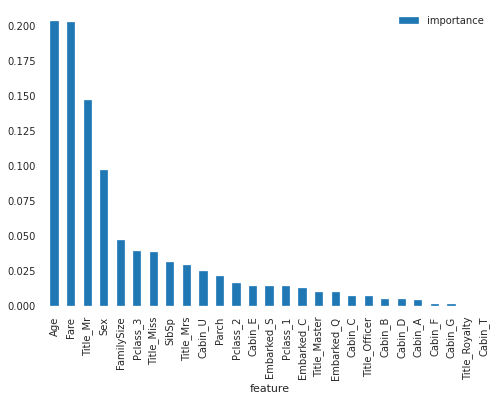

In [100]:
importances.plot.bar()

In [115]:
train_x.shape, test.shape, test_x.shape, train_y.shape, 

((712, 27), (418, 27), (179, 27), (712,))

In [46]:
'''Removing less important features '''

def delete_columns(data_frame):
    data_frame.drop(['Cabin_C', 'Title_Officer', 'Cabin_B', 'Cabin_D', 'Cabin_A', 'Cabin_F','Cabin_G', 'Cabin_T', 'Title_Royalty'], 
                    axis =1, inplace = True)
    return data_frame

In [47]:
# train_x = delete_columns(train_x)
test = delete_columns(test)
test_x = delete_columns(test_x)

/home/pranit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
train_x = delete_columns(train_x)

/home/pranit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
train_x.shape, test.shape, test_x.shape

((712, 18), (418, 18), (179, 18))

In [133]:
'''Training and Testing random forrest model on new data set with reduced features'''
# Random Forrest new model on reduced number of variables
rand = RandomForestClassifier(random_state=0)
rand.fit(train_x, train_y)
print("Training Accuracy:",round(rand.score(train_x, train_y)*100,2))
print("Validation Accuracy:",round(rand.score(test_x, test_y)*100,2))

Training Accuracy: 98.88
Validation Accuracy: 87.15


In [134]:
new_scores = cross_val_score(rand, train_x, train_y, cv=10, scoring = "accuracy")
print('Scores:', scores)
print(scores.mean(), scores.std())

Scores: [0.80555556 0.80555556 0.78873239 0.87323944 0.8028169  0.83098592
 0.83098592 0.77464789 0.8028169  0.84507042]
0.8160406885758998 0.02754970398728372


In [125]:
rand.feature_importances_

array([0.11772433, 0.21606427, 0.03688262, 0.02008822, 0.20377207,
       0.04784917, 0.02213459, 0.01287638, 0.0354265 , 0.00989972,
       0.03629996, 0.1256176 , 0.0389502 , 0.01376531, 0.02804101,
       0.01093928, 0.01153351, 0.01213527])

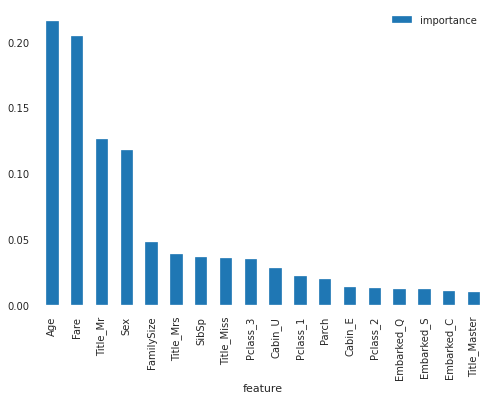

In [127]:
importances_new = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rand.feature_importances_,3)})
importances_new = importances_new.sort_values('importance',ascending=False).set_index('feature')
importances_new.plot.bar()

In [129]:
importances_new.reset_index()

,feature,importance
0,Age,0.216
1,Fare,0.204
2,Title_Mr,0.126
3,Sex,0.118
4,FamilySize,0.048
5,Title_Mrs,0.039
6,SibSp,0.037
7,Title_Miss,0.036
8,Pclass_3,0.035
9,Cabin_U,0.028


In [139]:
'''Random Forrest Hyperparemeter tuning '''

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

TypeError: score() missing 1 required positional argument: 'X'

In [141]:
clf.fit(train_x, train_y)
print(clf.score(train_x, train_y))

0.8469101123595506


In [143]:
clf.score(test_x, test_y)

0.8100558659217877

In [142]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 100}

In [145]:
# Model Accuracy = 0.79. Best till now submitted

random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 25,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(train_x, train_y)
random_forest.predict(test_x)
print(random_forest.score(train_x, train_y)*100)
print(random_forest.score(test_x, test_y)*100)


84.69101123595506
81.00558659217877


In [146]:
predictions = random_forest.predict(test)

In [147]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [150]:
def save_data(preds):
    d = pd.DataFrame()
    aux = pd.read_csv('./titanic/test.csv')
    d['PassengerId'] = aux['PassengerId']
    d['Survived'] = preds
    d.to_csv('./model_save.csv', index = False)
    return d    

In [ ]:
'''Submitted this results on kaggle and accuracy achieved: 0.79425'''

In [151]:
save_data(predictions)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
'''These predictions have accuracy of 0.79425 best till now'''

'These predictions have accuracy of 0.79425 best till now'